In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Загрузка и знакомство с данными. 
поиск пропусков, выбросов и аномалий

In [48]:
TRAIN_DATASET = "./train.csv"
TEST_DATASET = "./test.csv"

df = pd.read_csv(TRAIN_DATASET)
df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


In [3]:
df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [4]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Много пропусков в LifeSquare и Healthcare_1
Также странные значения в HouseYear, Rooms(нулевые значния), LifeSquare(max 7480), возможно HouseFloor(117 этажей многовато) 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

#### Имеются три категориальных признака (Ecology_2, Ecology_3, Shops_2).  К тому же признаки Room и HouseFloor имеют тип float, логично изменить их в int8

In [6]:
# df['Rooms'] = df['Rooms'].astype('int8')
# df['HouseFloor'] = df['HouseFloor'].astype('int8')
# df.info()

#### Данные с годами больше текущего надо менять на медианный

In [7]:
df[df['HouseYear'] > 2022]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8828,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096
9163,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396


### Целевая переменная

In [8]:
target_mean = round(df['Price'].mean(), 2)
target_median = df['Price'].median()
target_mode = df['Price'].mode()[0]

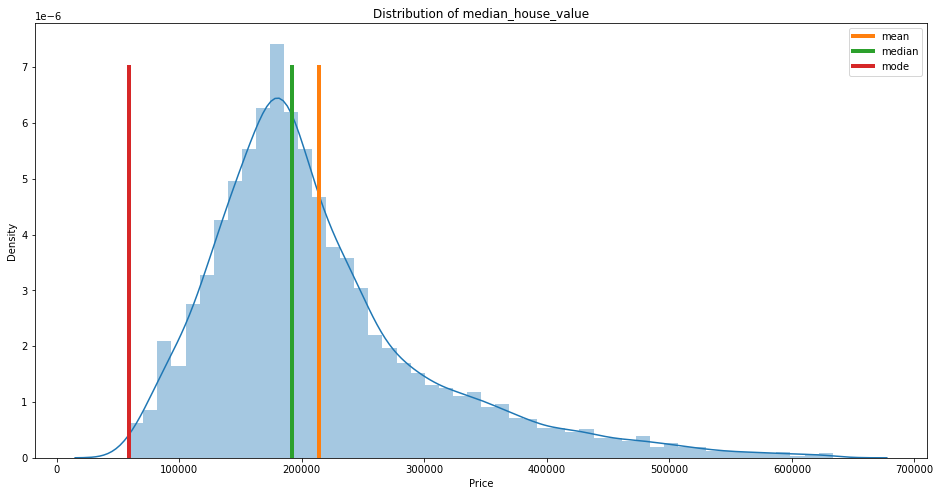

In [9]:
plt.figure(figsize = (16, 8))

sns.distplot(df['Price'], bins=50)

y = np.linspace(0, 0.000007, 2)
plt.plot([target_mean]*2, y, label='mean',  linewidth=4)
plt.plot([target_median]*2, y, label='median',  linewidth=4)
plt.plot([target_mode]*2, y, label='mode', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

In [10]:
df['Price'].value_counts()

232830.798767    1
111207.565421    1
108638.637214    1
188774.351894    1
244256.756548    1
                ..
263208.540162    1
190550.982049    1
259715.099993    1
259358.658002    1
166975.682285    1
Name: Price, Length: 10000, dtype: int64

In [11]:
print(target_mode)
target_mode == df['Price'].min()

59174.77802758122


True

Такое значение моды обусловлено тем, что в датасете вообще нет одинаковых значений целевой переменной, поэтому она равно минимуму
В целом распределение довольно ровное, без выбросов и аномалий. Медиана и среднее примерно на одном уровне цены, в районе 200 000

   ### Количественные признаки

Для начала выделим какие из них количественные, а какие категориальные

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [13]:
print(f"Number of uniques:\n \
        \tDistrictId: {df['DistrictId'].nunique()}\n \
        \tSocial_1: {df['Social_1'].nunique()}\n \
        \tSocial_2: {df['Social_2'].nunique()}\n \
        \tSocial_3: {df['Social_3'].nunique()}\n \
        \tHelthcare_2: {df['Helthcare_2'].nunique()}\n \
        \tShops_1: {df['Shops_1'].nunique()}")

Number of uniques:
         	DistrictId: 205
         	Social_1: 51
         	Social_2: 142
         	Social_3: 30
         	Helthcare_2: 7
         	Shops_1: 16


DistrictId точно категрия. Остальные тоже похожи на категории, поэтому с ними разберемся позже, запишем их в список и удалим из датасета

In [14]:
cat_features = ['DistrictId', 'Social_1', 'Ecology_2', 'Ecology_3', 'Social_2', 
                'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2']
# df_num = df.select_dtypes(include=np.number)
df_num = df.drop(columns=(cat_features + ['Id', 'Price']))
df_num

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Healthcare_1
0,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,NaN
1,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1183.0
2,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,240.0
3,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,NaN
4,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,NaN
...,...,...,...,...,...,...,...,...,...
9995,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,NaN
9996,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,NaN
9997,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,NaN
9998,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,125.0


array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>,
        <AxesSubplot:title={'center':'LifeSquare'}>],
       [<AxesSubplot:title={'center':'KitchenSquare'}>,
        <AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>],
       [<AxesSubplot:title={'center':'HouseYear'}>,
        <AxesSubplot:title={'center':'Ecology_1'}>,
        <AxesSubplot:title={'center':'Healthcare_1'}>]], dtype=object)

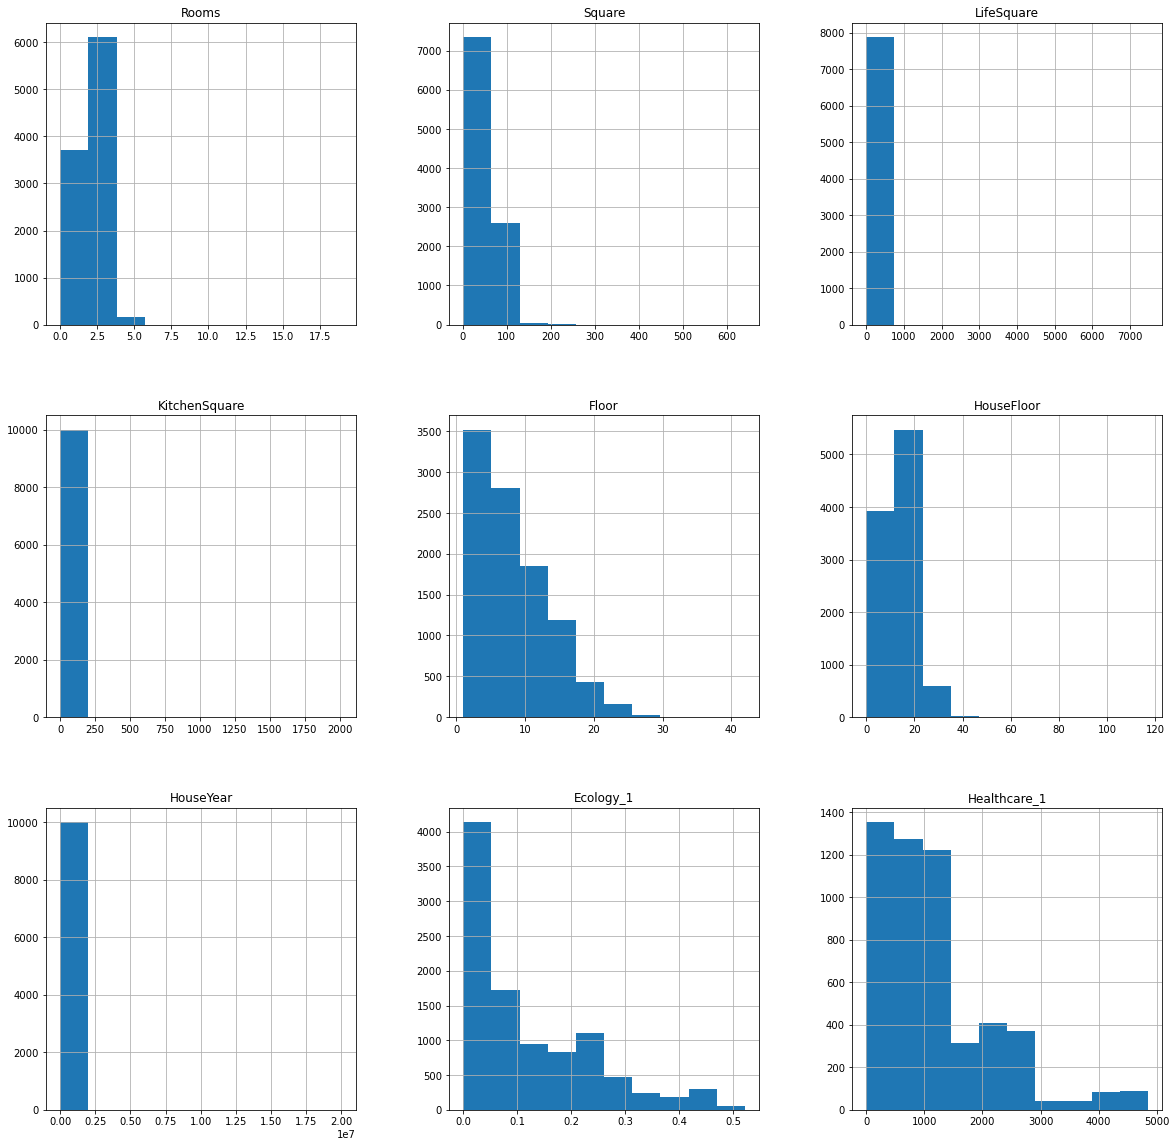

In [15]:
df_num.hist(figsize=(20,20))

In [16]:
print(df["Square"].quantile(0.01), df["Square"].quantile(0.99))
df[(df["Square"] < df["Square"].quantile(0.01)) | (df["Square"] > df["Square"].quantile(0.99))]

29.719794884038905 117.85611482113002


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
111,13875,20,1.0,28.438794,32.514021,6.0,6,10.0,2014,0.019509,B,B,37,7687,11,176.0,5,5,B,199248.114376
130,8800,23,1.0,29.706031,NaN,0.0,5,12.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,60502.583500
136,5284,27,4.0,119.914990,78.518874,13.0,8,12.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,221374.057293
161,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,438005.182323
234,4935,23,1.0,28.859885,NaN,1.0,12,11.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,68375.615508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9846,1205,23,2.0,148.671938,100.201652,1.0,1,3.0,2013,0.014073,B,B,2,475,0,NaN,0,0,B,152464.848743
9869,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
9877,11391,62,3.0,122.181937,NaN,1.0,3,3.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,259991.137225
9990,10635,21,1.0,18.983962,11.419796,2.0,1,5.0,1967,0.194489,B,B,47,8004,3,125.0,3,5,B,112411.221700


In [17]:
print(df["LifeSquare"].quantile(0.03), df["LifeSquare"].quantile(0.99))
print(df["KitchenSquare"].quantile(0.05), df["KitchenSquare"].quantile(0.99))
print(df["Rooms"].quantile(0.05), df["Rooms"].quantile(0.99))

14.524808682119971 95.65247153492501
0.0 16.0
1.0 4.0


Очень похоже на выбросы в фичах Square, LifeSquare, KitchenSquire и, возможно Floor и HouseFloor. В HouseYear точно несколько некорректных значений, которые нужно исправить, либо удалить

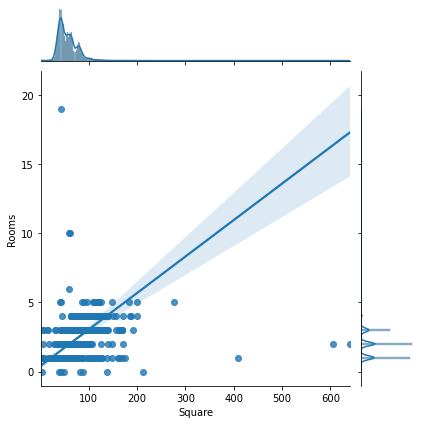

In [18]:
sns.jointplot(df['Square'], df['Rooms'], kind='reg')
# При площади менее 100 кв м пристуствуют значения количества комнат 10 и даже 20
# Так же при количестве комнат менее 5 присутствуют большие площади 200, 400 и даже 600 и более. 
# Явные выбросы, нужно будет менять на медианы значений

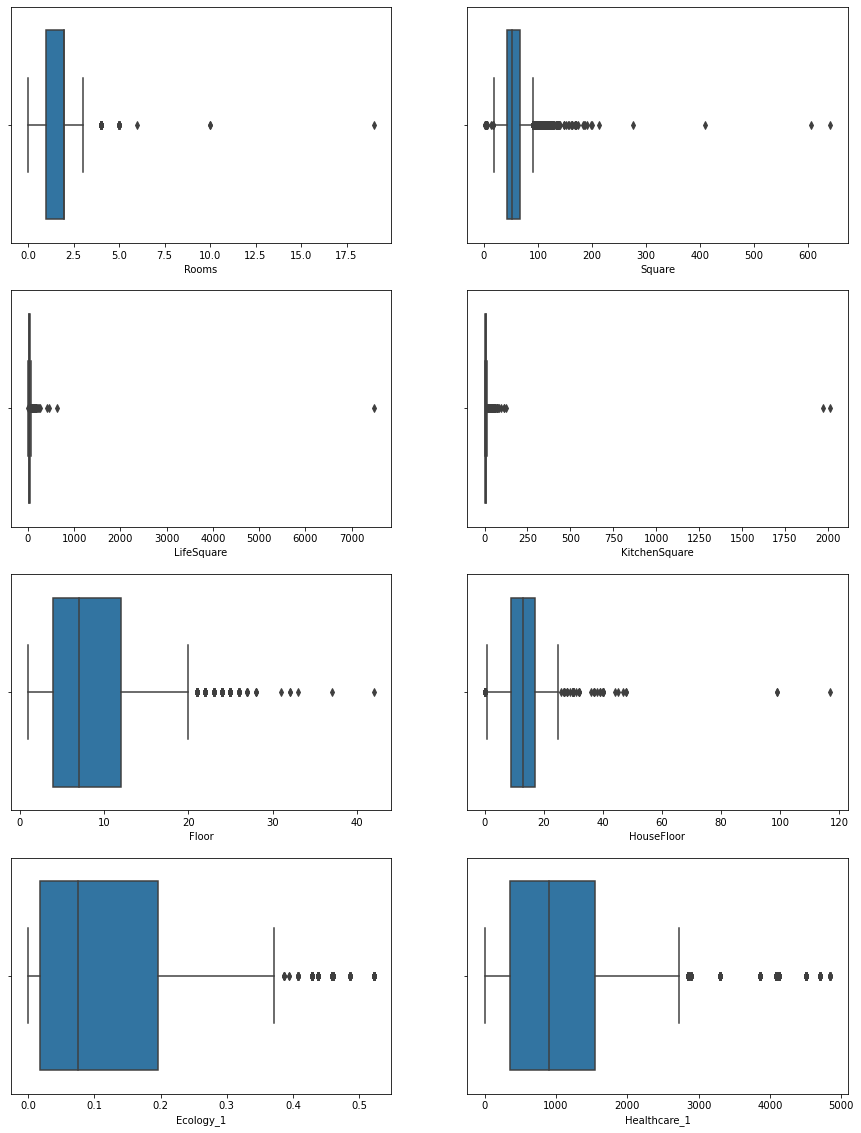

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(15, 20)
for axe, col_name in zip(axes.flatten(), df_num.drop(columns='HouseYear').columns):
    sns.boxplot(df_num[col_name], ax=axe, whis=1, x=col_name)
#     axe.boxplot(df_num[col_name], whis=1.5, vert=False)
plt.show()
#sns.boxplot(data=df_num[['Square', 'LifeSquare', 'KitchenSquare']], orient='h', whis=1.5)

### Как будем обрабатывать выбросы:
##### Rooms:
    введем новую переменную MidRoomSquare (средняя площадь комнаты) LifeSquare/Rooms. Найдем ее медиану и значения выбросов и пропусков заполним ей. Саму переменную Rooms можно удалить, она будет заложена в двух, LifeSquare и MidRoomSquare, хотя можно и оставить. 
    В количестве комнат выбросом будем считать значения больше 5 и меньше 1
##### Square, KitchenSquare и LifeSquare:
    так же как с комнатами, введем переменную KitchenSquareRatio и LifeSquareRatio (доля площади кухни и жилой)
    Менять на медианные их значения, там, где они слишком большие или маленькие, либо превышают общую площадь квартиры
    Выбросы для LifeSquare будем считать < 14 (квантиль 0.03) и > 95 (квантиль 0.99)
    Для кухни > 16 (квантиль 0.99)
    Для общей площади < 29 и > 117 (0.01 и 0.99 квантили)

##### HouseFloor и Floor
    выглядят более менее нормально, но есть объекты, где этаж больше этажности дома и нулевые этажи. Там где этаж больше дома будем менять их местами, в нулевые запишем медиану, если она не больше этажности дома либо 1.


##### Ecology_1 и Healthcare_1 
    про них ничего не известно, поэтому анализировать нет возможности, оставлю как есть
    Сделаю таблицу со средними по району Healthcare_1 и заполню ими пропуски в соответсвии с районом

### 

In [20]:
df_num[df_num['KitchenSquare'] > df_num['Square']].shape[0]

4

In [21]:
df_num[df_num["KitchenSquare"] == 0].shape[0]

697

In [22]:
df_num[df_num['LifeSquare'] > df_num['Square']].shape[0]

482

In [23]:
df_num[df_num['Floor'] > df_num['HouseFloor']].shape[0]

1825

In [24]:
df_num["Floor"].min()

1

In [25]:
df_num[df_num['HouseFloor'] == 0].shape[0]

269

In [26]:
df_num[df_num['Rooms'] == 0].shape[0]

8

In [27]:
df[df['Healthcare_1'].isna()]["DistrictId"]

0        27
3         1
4        94
8         1
11       88
       ... 
9993      1
9995     61
9996     27
9997    178
9999     94
Name: DistrictId, Length: 4798, dtype: int64

In [28]:
df_c = df.copy()
care_by_dist = df.groupby("DistrictId").agg(MidHealthcare_1_ByDist=("Healthcare_1", "median"))
df_c = df_c.merge(care_by_dist, on="DistrictId", how="left")
#df_c.loc[df_c['Healthcare_1'].isna(), 'Healthcare_1'] = df_c.loc[df_c['Healthcare_1'].isna(), 'MidHealthcare_1_ByDist']
df_c['Healthcare_1'].fillna(df_c['MidHealthcare_1_ByDist'], inplace=True)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      10000 non-null  int64  
 1   DistrictId              10000 non-null  int64  
 2   Rooms                   10000 non-null  float64
 3   Square                  10000 non-null  float64
 4   LifeSquare              7887 non-null   float64
 5   KitchenSquare           10000 non-null  float64
 6   Floor                   10000 non-null  int64  
 7   HouseFloor              10000 non-null  float64
 8   HouseYear               10000 non-null  int64  
 9   Ecology_1               10000 non-null  float64
 10  Ecology_2               10000 non-null  object 
 11  Ecology_3               10000 non-null  object 
 12  Social_1                10000 non-null  int64  
 13  Social_2                10000 non-null  int64  
 14  Social_3                10000 non-null 

### Категориальные переменные

In [29]:
for feature in cat_features:
    print(f'{feature}: {df[feature].nunique()}')

DistrictId: 205
Social_1: 51
Ecology_2: 2
Ecology_3: 2
Social_2: 142
Social_3: 30
Helthcare_2: 7
Shops_1: 16
Shops_2: 2


In [30]:
df['Ecology_2'].unique(), df['Ecology_3'].unique(), df['Shops_2'].unique()

(array(['B', 'A'], dtype=object),
 array(['B', 'A'], dtype=object),
 array(['B', 'A'], dtype=object))

#### Ecology_2, Ecology_3, Shops_2 бинарные признаки. A => 0, B => 1

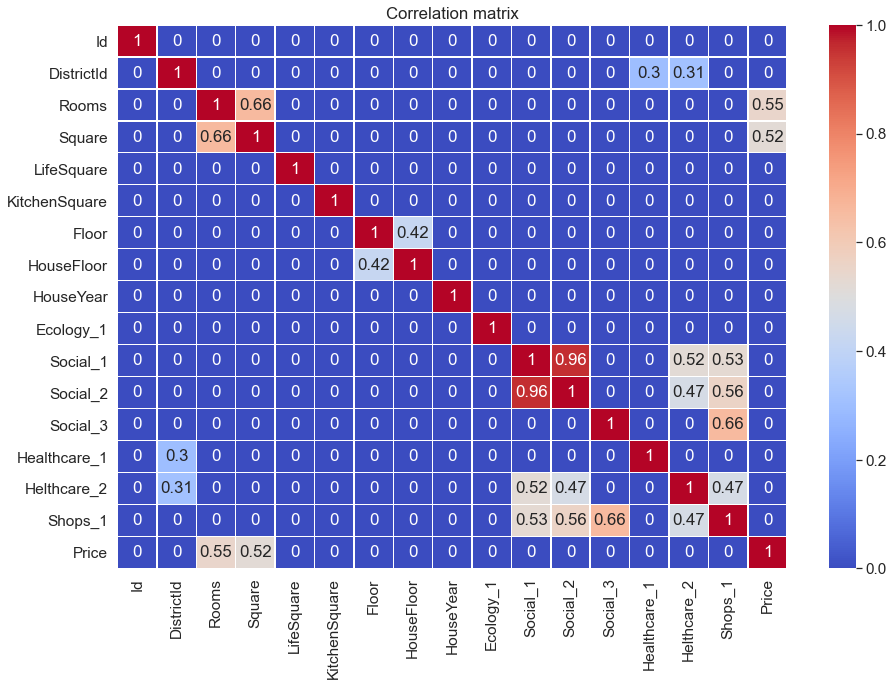

In [31]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Social_2 и Social_1 очень сильно зависят между собой линейно. Оставлю их в количественных

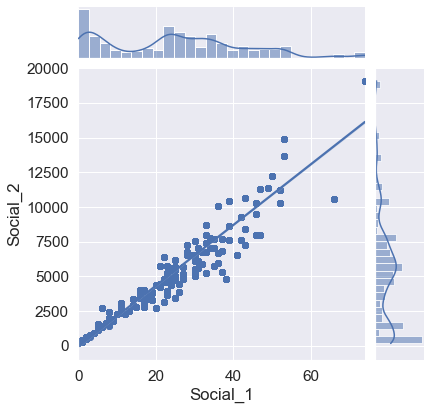

In [32]:
sns.jointplot(df['Social_1'], df['Social_2'], kind='reg')

То же самое Social_3 и Shops_1 оставлю количественными

### DistrictId:
###### Значений слишком много
    
    рассчитываем среднюю (или лучше медианную) цену за кв. м. по каждому району и вписываем ее вместо DistrictId

In [33]:
df_copy = df.copy()
df_copy["MeterPrice"] = df_copy["Price"]/df_copy["Square"]

In [34]:
med_meter = df_copy.groupby(["DistrictId"]).agg({"MeterPrice": ["mean", "median"]})

In [35]:
med_meter

MeterPrice             
                   mean       median
DistrictId                          
0           3710.401014  3935.906409
1           3522.839502  3251.647396
2           4560.204511  4550.709250
3           3783.790553  3892.203737
4           5247.142313  5716.888354
...                 ...          ...
202         7447.527733  7447.527733
205         5101.016598  5101.016598
207         5550.678339  5550.678339
208         8005.605047  8005.605047
209         4176.437542  4176.437542

[205 rows x 2 columns]

### Классы для обработки данных

In [36]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
#    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
#     print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
#     print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [37]:
from datetime import date

class DataPipeline:
    ### сюда передаем тренировочный датасет
    def fit(self, X, y):
        data = X.copy()
        data['Price'] = y
        ### Rooms
        mask = (data['Rooms'] !=0) & (~data['LifeSquare'].isna())
        data['MidRoomSquare'] = data.loc[mask, 'LifeSquare'] / data.loc[mask, 'Rooms']
        self.room_square_median = data['MidRoomSquare'].median()
        ### LifeSquare
        mask = ~data['LifeSquare'].isna()
        data['LifeSquareRatio'] = data.loc[mask, 'LifeSquare'] / data.loc[mask, 'Square']
        self.mid_life_square_ratio = data['LifeSquareRatio'].median()
        ### KitchenSquare
        data['KitchenSquareRatio'] = data['KitchenSquare'] / data['Square']
        self.mid_kitchen_square_ratio = data['KitchenSquareRatio'].median()
        ###Square
        self.mid_square = data["Square"].median()
        ### HouseYear 
        ### в трансформе будем менять его на возраст дома
        ### Если год больше текущего и меньше 1900 меняем на медиану
        self.house_year_median = data['HouseYear'].median()
        #### Пропуски в Healthcare_1 заменим на медиану
        ### + медианы по районам
        self.care_by_dist = data.groupby("DistrictId").agg(MidHealthcare_1_ByDist=("Healthcare_1", "median"))
        self.health_care_1 = data['Healthcare_1'].median()
        #### DistrictId заменим на среднюю цену метра по району
        #### это датафрейм. его в трансформе объединим с обучающим по ключу DistrictId
        data["MeterPrice"] = data["Price"] / data["Square"]
        self.mid_meter_price_per_dist = data.groupby(["DistrictId"], as_index=False).agg(MedianMeterPrice = ("MeterPrice", "median"))
        self.mid_meter_price_per_dist_median = self.mid_meter_price_per_dist["MedianMeterPrice"].median()
        
        ### Это убрал, потому как с ними модели очень сильно переобучаются
#         self.med_price_by_district = data.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
#                                             .rename(columns={'Price':'MedPriceByDistrict'})
            
#         self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()


    def transform(self, df):
        result = df.copy()
        result['Rooms'] = result['Rooms'].astype('int8')
        result['HouseFloor'] = result['HouseFloor'].astype('int8')
        
        #### Заполняем пропуски и выбросы в LifeSquare
        mask = (result['LifeSquare'].isna()) | \
                (result['LifeSquare'] > result['LifeSquare'].quantile(0.99)) | \
                (result['LifeSquare'] < result['LifeSquare'].quantile(0.03)) | \
                (result["LifeSquare"] > result["Square"])
        result["ChangedLifeSquare"] = mask.astype("int8")
        result.loc[mask, 'LifeSquare'] = result.loc[mask, 'Square'] * self.mid_life_square_ratio
        
        #### Заполняем нули в Rooms
        result["ChangedRooms"] = ((result["Rooms"] == 1) | (result["Rooms"] > 5)).astype("int8")
        result.loc[result['Rooms'] == 0, 'Rooms'] = (result.loc[result['Rooms'] == 0, 'LifeSquare'] / self.room_square_median).astype('int8')
        ### Выбросы в Rooms и площадях
        result.loc[result['Rooms'] > 5, "Rooms"] = (result.loc[result['Rooms'] > 5, 'LifeSquare'] / self.room_square_median).astype('int8')
        ### Выбросы Square
        mask = (result["Square"] > result["Square"].quantile(0.99))  | (result["Square"] < result["Square"].quantile(0.01))
        result["ChangedSquare"] = mask.astype("int8")
        result.loc[mask, "Square"] = self.mid_square
        ### Нули и аномалии в KitchenSquare
        mask = ((result["KitchenSquare"] > result["Square"]) | \
                (result["KitchenSquare"] > result["KitchenSquare"].quantile(0.99)))
        result["ChangedKitchenSquare"] = mask.astype("int8")
        result.loc[mask, "KitchenSquare"] = result.loc[mask, 'Square'] * self.mid_kitchen_square_ratio
        
        ### HouseFloor и Floor
        mask = result["Floor"] > result["HouseFloor"]
        result.loc[mask, "Floor"], result.loc[mask, "HouseFloor"] = result.loc[mask, "HouseFloor"], result.loc[mask, "Floor"]
        result.loc[result["Floor"] == 0, "Floor"] = 1
        ### HouseYear
        cur_year = date.today().year
        result.loc[(result["HouseYear"] > cur_year) | (result["HouseYear"] < 1900), "HouseYear"] = self.house_year_median
        result["IsHouseNew"] = ((cur_year - result["HouseYear"]) < 20).astype("int8")
        
        ### DistrictId
        result = result.merge(self.mid_meter_price_per_dist, on="DistrictId", how="left")
        result["MedianMeterPrice"].fillna(self.mid_meter_price_per_dist_median, inplace=True)
        
#         result = result.merge(self.med_price_by_district, on=["DistrictId", "Rooms"], how="left")
#         result["MedPriceByDistrict"].fillna(self.med_price_by_district_median, inplace=True)
    
        ### Healthcare_1
        result["healthcare_1_na"] = (result["Healthcare_1"].isna()).astype("int8")
        
        result = result.merge(self.care_by_dist, on="DistrictId", how="left")
        result['Healthcare_1'].fillna(result['MidHealthcare_1_ByDist'], inplace=True)
        result["Healthcare_1"].fillna(self.health_care_1, inplace=True)

        
        #### Категории Ecology_2, Ecology_3, Shops_2
        bin_cats = ['Ecology_2', 'Ecology_3', 'Shops_2']
        result[bin_cats] = (result[bin_cats] == 'B').astype('int8')
         
        ### Дропаем лишнее
        drop_cols = ["Id", "DistrictId", 'MidHealthcare_1_ByDist']
        result.drop(columns=drop_cols, inplace=True)
        
        return reduce_mem_usage(result)
    

In [38]:
from sklearn.model_selection import train_test_split

### считываем данные с нуля
df = pd.read_csv(TRAIN_DATASET)
data_pl = DataPipeline()

y = df['Price']
X = df.drop(columns="Price")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

data_pl.fit(X_train, y_train)

X_train = data_pl.transform(X_train)
X_test = data_pl.transform(X_test)
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rooms                 2000 non-null   int8   
 1   Square                2000 non-null   float32
 2   LifeSquare            2000 non-null   float32
 3   KitchenSquare         2000 non-null   float32
 4   Floor                 2000 non-null   int8   
 5   HouseFloor            2000 non-null   int8   
 6   HouseYear             2000 non-null   int16  
 7   Ecology_1             2000 non-null   float32
 8   Ecology_2             2000 non-null   int8   
 9   Ecology_3             2000 non-null   int8   
 10  Social_1              2000 non-null   int8   
 11  Social_2              2000 non-null   int16  
 12  Social_3              2000 non-null   int16  
 13  Healthcare_1          2000 non-null   float32
 14  Helthcare_2           2000 non-null   int8   
 15  Shops_1              

### Обучение

Буду использовать 3 модели: RandomForestRegressor, GradientBoostingRegressor и HistGradientBoostingRegressor с поиском по сетке GridSearchCV
В итоге лучшие результаты показал HistGradientBoostingRegressor с лучшими параметрами на трейне:

{'max_depth': 7, 'max_iter': 100, 'min_samples_leaf': 20}


In [39]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    """
    Выводит R2 и строит графики для оценки качества модели
    """
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))

    plt.figure(figsize=(18,10))
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [40]:

%%time
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

model = HistGradientBoostingRegressor(max_depth=7, max_iter=100, min_samples_leaf=20)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

CPU times: user 2.25 s, sys: 87.5 ms, total: 2.34 s
Wall time: 712 ms


Train R2:	0.86
Test R2:	0.764


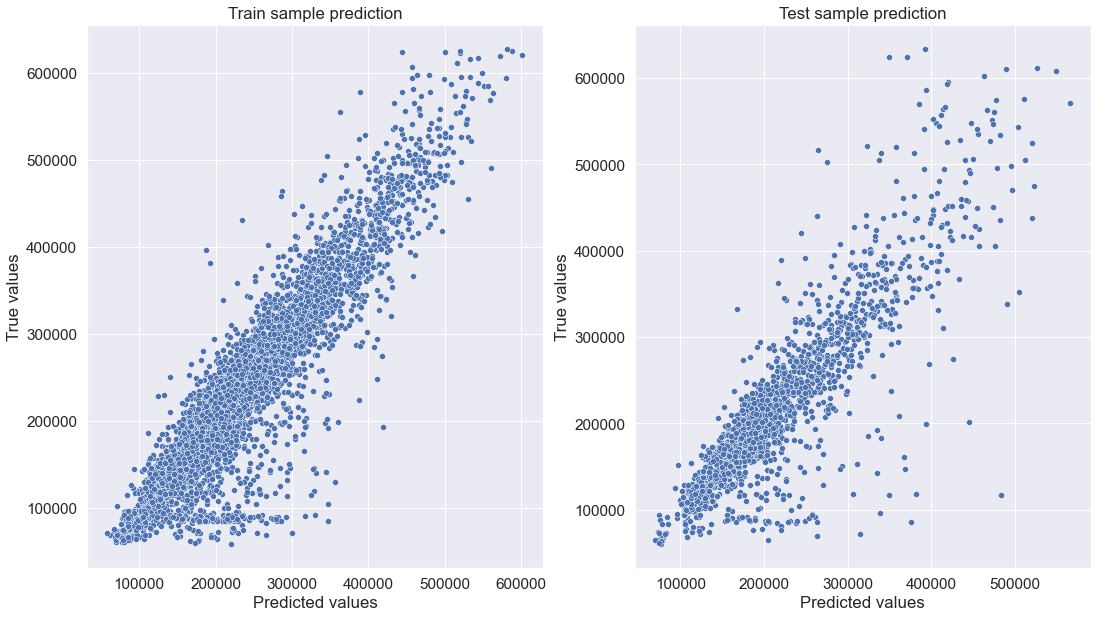

In [41]:
evaluate_preds(y_train, y_train_pred, y_test, y_test_pred)

### Проверка и выгрузка на тестовых данных

In [42]:
test_df = pd.read_csv(TEST_DATASET)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [43]:
X_test_ = data_pl.transform(test_df)
X_test_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rooms                 5000 non-null   int8   
 1   Square                5000 non-null   float32
 2   LifeSquare            5000 non-null   float32
 3   KitchenSquare         5000 non-null   float32
 4   Floor                 5000 non-null   int8   
 5   HouseFloor            5000 non-null   int8   
 6   HouseYear             5000 non-null   int16  
 7   Ecology_1             5000 non-null   float32
 8   Ecology_2             5000 non-null   int8   
 9   Ecology_3             5000 non-null   int8   
 10  Social_1              5000 non-null   int8   
 11  Social_2              5000 non-null   int16  
 12  Social_3              5000 non-null   int16  
 13  Healthcare_1          5000 non-null   float32
 14  Helthcare_2           5000 non-null   int8   
 15  Shops_1              

In [44]:
submit_df = test_df[["Id"]]
submit_df["Price"] = model.predict(X_test_)
submit_df.shape

(5000, 2)

In [45]:
submit_df.to_csv("./submit.csv", index=False)

### Результат на kaggle 0.72810

### Предположение: 
Если сделать fit по всему трейновому датасету, то скор может быть существенно выше. Это проверено при уменьшении размера валидационного датасета, соответственно увеличением тренировочного. Предположу, что разбиение на тренировочный и валидационный датасеты не обязательно, так как использовался поиск по сетке с кросс-валидацией на 5 фолдах.
Поэтому повторяю всю процедуру по всему тренировочному датасету.
И опять победил HistGradientBoostingRegressor с параметрами:

#### {'max_depth': 20, 'max_iter': 100, 'min_samples_leaf': 15}

Это позволило существенно увеличить скор на kaggle
####  0.72810 => 0.74871

In [46]:
data_pl.fit(X, y)
X_train_full = data_pl.transform(X)
X_test_full = data_pl.transform(test_df)

model_new = HistGradientBoostingRegressor(max_depth=20, max_iter=100, min_samples_leaf=15)
model_new.fit(X_train_full, y)

submit_full = test_df[["Id"]]
submit_full["Price"] = model_new.predict(X_test_full)
submit_full.to_csv("./submit_full.csv", index=False)

In [47]:
r2(y, model_new.predict(X_train_full))

0.870376076970589

### Ник на kaggle: Alexander Maslikhin
### Score: 0.74871



